In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-11-12 11:23:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-12 11:23:35 (60.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import os 


os.environ['KAGGLE_USERNAME'] = "ankitkumar2117"

os.environ['KAGGLE_KEY'] = "b553e85b776c6041763213a2f543c737"

! kaggle datasets download -d datamunge/sign-language-mnist

 83% 52.0M/62.6M [00:02<00:00, 11.7MB/s]
100% 62.6M/62.6M [00:02<00:00, 31.7MB/s]


In [ ]:
unzip_data('sign-language-mnist.zip')

In [ ]:
walk_through_dir('sign_mnist_train')

There are 0 directories and 1 images in 'sign_mnist_train'.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
df["label"].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [ ]:
df.shape

(27455, 785)

In [ ]:
df_test=pd.read_csv("/content/sign_mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
df_test.shape

(7172, 785)

In [ ]:
import numpy as np
df_train = np.array(df, dtype = 'float32')
df_test = np.array(df_test, dtype='float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]               
len(class_names)               

25

Label for the image is:  C


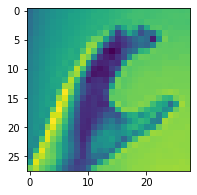

In [ ]:
import random
import matplotlib.pyplot as plt
i = random.randint(1,df.shape[0])
fig1, ax1 = plt.subplots(figsize=(3,3))
plt.imshow(df_train[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(df_train[i,0])])

In [ ]:
X_train = df_train[:, 1:] /255.
X_test = df_test[:, 1:] /255.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = df_train[:, 0]
y_train = to_categorical(y_train, num_classes=25)

y_test = df_test[:, 0]
y_test = to_categorical(y_test, num_classes=25)

TensorFlow Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_0=Sequential([
    Conv2D(16,3,activation='relu',input_shape=(28,28,1)),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(25,activation='softmax')])

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_0= model_0.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 10, batch_size= 32)

Epoch 1/10
858/858 [==============================] - 7s 7ms/step - loss: 2.2553 - accuracy: 0.2907 - val_loss: 1.1603 - val_accuracy: 0.5810
Epoch 2/10
858/858 [==============================] - 6s 7ms/step - loss: 0.9506 - accuracy: 0.6709 - val_loss: 0.6466 - val_accuracy: 0.7660
Epoch 3/10
858/858 [==============================] - 6s 7ms/step - loss: 0.6181 - accuracy: 0.7845 - val_loss: 0.4689 - val_accuracy: 0.8423
Epoch 4/10
858/858 [==============================] - 6s 7ms/step - loss: 0.4439 - accuracy: 0.8475 - val_loss: 0.3554 - val_accuracy: 0.8848
Epoch 5/10
858/858 [==============================] - 6s 8ms/step - loss: 0.3340 - accuracy: 0.8840 - val_loss: 0.2876 - val_accuracy: 0.9006
Epoch 6/10
858/858 [==============================] - 6s 7ms/step - loss: 0.2713 - accuracy: 0.9072 - val_loss: 0.2620 - val_accuracy: 0.9101
Epoch 7/10
858/858 [==============================] - 6s 7ms/step - loss: 0.2230 - accuracy: 0.9255 - val_loss: 0.2557 - val_accuracy: 0.9116
Epoch 

In [ ]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1

In [ ]:
# Create Model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),padding="same", input_shape = (28,28,1), kernel_regularizer=l2(0.0002), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), padding="same" ,kernel_regularizer=l2(0.0002), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3),padding="same" ,kernel_regularizer=l2(0.0002),  activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))

# Compile
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 64)         

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/10
215/215 [==============================] - 3s 15ms/step - loss: 0.0447 - acc: 0.9991 - val_loss: 0.1628 - val_acc: 0.9677
Epoch 2/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0398 - acc: 0.9995 - val_loss: 0.1508 - val_acc: 0.9689
Epoch 3/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0360 - acc: 0.9997 - val_loss: 0.1497 - val_acc: 0.9702
Epoch 4/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0339 - acc: 0.9994 - val_loss: 0.1341 - val_acc: 0.9728
Epoch 5/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0308 - acc: 0.9996 - val_loss: 0.1525 - val_acc: 0.9651
Epoch 6/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0286 - acc: 0.9995 - val_loss: 0.1326 - val_acc: 0.9738
Epoch 7/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0264 - acc: 0.9996 - val_loss: 0.1402 - val_acc: 0.9663
Epoch 8/10
215/215 [==============================] - 3s 14ms/step - 

In [ ]:
model1.save('Sign_language model.h5')

In [ ]:
class_names = np.array(class_names)
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'],
      dtype='<U1')

In [ ]:
preds = model1.predict(X_test) 
preds=np.array(preds)
preds

array([[2.37651808e-11, 1.14327775e-11, 2.21222331e-06, ...,
        1.51696104e-12, 1.25950583e-05, 4.74183359e-09],
       [2.90852925e-10, 8.53145480e-07, 2.21934082e-10, ...,
        3.03921013e-08, 1.59181113e-09, 4.17878043e-09],
       [4.67154652e-17, 3.62198357e-12, 6.00126204e-19, ...,
        3.79023229e-10, 2.18115179e-10, 1.63632521e-08],
       ...,
       [1.94500131e-15, 5.41678043e-22, 9.99994755e-01, ...,
        7.96132310e-22, 9.83646550e-16, 1.69601042e-19],
       [1.93694270e-08, 3.87697185e-07, 2.46821147e-10, ...,
        1.10456384e-11, 4.31879879e-12, 9.91552154e-18],
       [2.98314178e-16, 2.03614979e-24, 9.99998093e-01, ...,
        9.78697837e-24, 7.01554708e-17, 2.69156574e-20]], dtype=float32)

In [ ]:
preds.shape

(7172, 25)

In [ ]:
prediction = np.argmax(preds, axis=1)
prediction

array([ 6,  5, 10, ...,  2,  4,  2])

Predicted Label:  D


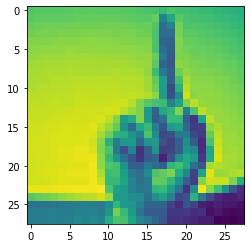

In [ ]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])